# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

## Fetching Datasets

In [2]:
companies = pd.read_csv("companies.txt",encoding='ISO-8859-1',sep = '\t')
rounds2 = pd.read_csv("rounds2.csv",encoding = 'ISO-8859-1')

### viewing data

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### checking for type of data in both the datasets

In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
#checking null data in companies dataset
100*((companies.isnull().sum())/len(companies.index))

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [8]:
# taking rows that have less than 5 empty columns
companies = companies[companies.isnull().sum(axis=1)<=4]

In [9]:
# dropping duplicate rows
companies.drop_duplicates(inplace = True)

## dropping NULL values as data cant be imputed

In [10]:
companies.dropna(inplace = True)

In [11]:
100*((rounds2.isnull().sum())/len(rounds2.index))

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [12]:
# dropping funding_round_code as it has 73% null data
rounds2.drop('funding_round_code',axis = 1,inplace =True)

In [13]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [14]:
# dropping rows with null data
rounds2.dropna(inplace = True)

# CHECKPOINT 1 

In [15]:
rounds2.company_permalink.str.lower().nunique()

53915

In [16]:
print(companies.permalink.str.lower().nunique())
print(companies.name.str.lower().nunique())

43000
42875


In [17]:
companies.nunique()

permalink        43000
name             42898
homepage_url     42949
category_list    20600
status               4
country_code       108
state_code         287
region             988
city              4009
founded_at        3662
dtype: int64

In [18]:
rounds2.company_permalink = rounds2.company_permalink.str.lower()
companies.permalink = companies.permalink.str.lower()

In [19]:
a = companies.permalink.unique()
b = rounds2.company_permalink.unique()

In [20]:
a = a.tolist()
b = b.tolist()

In [21]:
b in a

False

## merging the two dataframe into master_df

In [22]:
master_df = pd.merge(companies,rounds2,left_on = companies.permalink,right_on = rounds2.company_permalink)

In [23]:
 master_df.isnull().sum()

key_0                      0
permalink                  0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
founded_at                 0
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [24]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71580 entries, 0 to 71579
Data columns (total 16 columns):
key_0                      71580 non-null object
permalink                  71580 non-null object
name                       71580 non-null object
homepage_url               71580 non-null object
category_list              71580 non-null object
status                     71580 non-null object
country_code               71580 non-null object
state_code                 71580 non-null object
region                     71580 non-null object
city                       71580 non-null object
founded_at                 71580 non-null object
company_permalink          71580 non-null object
funding_round_permalink    71580 non-null object
funding_round_type         71580 non-null object
funded_at                  71580 non-null object
raised_amount_usd          71580 non-null float64
dtypes: float64(1), object(15)
memory usage: 9.3+ MB


In [25]:
#dropping company_permalink column as it is duplicate column
master_df.drop('company_permalink',axis =1,inplace = True)

In [26]:
# dropping columns with irrelevant data
master_df.drop(['key_0','state_code','city','region'],axis =1,inplace = True)

In [27]:
master_df.head()

,permalink,name,homepage_url,category_list,status,country_code,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
1,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0


# CHECKPOINT 2

## fetching data of countires where english is primary language

In [28]:
eng_speaking_countires = pd.read_html('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')

In [29]:
eng_speaking_countires = eng_speaking_countires[0].append([eng_speaking_countires[1] for i in (0,len(eng_speaking_countires)+1)])

In [30]:
eng_speaking_countires = pd.DataFrame(eng_speaking_countires)
eng_speaking_countires.head()

,Alpha-3 code,Country,Nr,Population,Population1,Primary language?,Region
0,AUS,Australia,1,25019600.0,NaN,Yes,Oceania
1,NZL,New Zealand[1],2,4893830.0,NaN,Yes,Oceania
2,GBR,United Kingdom,3,66040229.0,NaN,Yes,Europe
3,USA,United States,4,328239523.0,NaN,Yes,North America/Oceania
0,ATG,Antigua and Barbuda[2],1,NaN,85000,Yes,Caribbean


In [31]:
eng_speaking_countires = eng_speaking_countires[eng_speaking_countires['Primary language?'] != 'No']

## Handling Junk data

In [32]:
master_df['permalink'] = master_df['permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [33]:
#Printing Final Head values
master_df.head()

,permalink,name,homepage_url,category_list,status,country_code,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
1,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0


## filtering data having funding_round_type as 'seed', 'venture', 'angel', 'private_equity'

In [34]:
lst = ['seed', 'venture','angel','private_equity']
master_df = master_df[master_df['funding_round_type'].isin(lst)]

In [35]:
master_df.head()
master_df.shape

(60987, 11)

In [36]:
# average funding of different funding types
round(pd.pivot_table(data = master_df, columns = 'funding_round_type',values = 'raised_amount_usd'),2)

funding_round_type,angel,private_equity,seed,venture
raised_amount_usd,932646.25,73296692.44,759309.27,12124393.61


In [37]:
# most suitable funding typefor SPARK FUNDS
(master_df['funding_round_type'][master_df['raised_amount_usd'].apply(lambda x : 5000000<= x <= 15000000)]).value_counts().index[0]

'venture'

# CHECKPOINT 3

## filtering out data from master dataframe of companies that lie in countries having english as primary language

In [38]:
master_df = master_df.merge(eng_speaking_countires,left_on = master_df['country_code'],right_on = eng_speaking_countires['Alpha-3 code'])

In [39]:
master_df.head()

,key_0,permalink,name,homepage_url,category_list,status,country_code,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Alpha-3 code,Country,Nr,Population,Population1,Primary language?,Region
0,USA,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,USA,United States,4,328239523.0,NaN,Yes,North America/Oceania
1,USA,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,USA,United States,4,328239523.0,NaN,Yes,North America/Oceania
2,USA,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,USA,United States,4,328239523.0,NaN,Yes,North America/Oceania
3,USA,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,USA,United States,4,328239523.0,NaN,Yes,North America/Oceania
4,USA,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,USA,United States,4,328239523.0,NaN,Yes,North America/Oceania


In [40]:
# dropping Unnecessary columns
master_df.drop(['key_0','Alpha-3 code','Population','Population1','Primary language?','Region','Nr','Country','name','homepage_url','status','founded_at','funding_round_permalink','funded_at'],axis = 1,inplace = True)

In [41]:
master_df.columns

Index(['permalink', 'category_list', 'country_code', 'funding_round_type',
       'raised_amount_usd'],
      dtype='object')

## filtering master_df to contain rows of 'venture' funding type

In [42]:
master_df_venture = master_df[(master_df['funding_round_type'].apply(lambda x : x == 'venture')) & (master_df['raised_amount_usd'].apply(lambda x : 5000000<= x <= 15000000))]

## finding the top 9 english speaking countries with maximum investment amount acheived

In [43]:
inter_df = pd.pivot_table(data = master_df_venture , columns = 'funding_round_type',index = 'country_code', values = 'raised_amount_usd',aggfunc = 'sum')

In [44]:
inter_df.sort_values(by = 'venture',ascending = False,inplace = True)

In [45]:
lst_top9 = inter_df.index[0:9]

In [46]:
lst_top9 = lst_top9.values.tolist()

## top_9 ountries datframe containing top 9 countries and their investment

In [47]:
top_9 = inter_df[inter_df.index.isin(lst_top9)]
top_9

funding_round_type,venture
country_code,
USA,8.919167e+10
CAN,5.585332e+09
IND,5.017396e+09
GBR,4.036404e+09
IRL,8.456803e+08
AUS,4.357500e+08
NGA,1.520000e+08
NZL,9.470000e+07
KEN,5.600000e+07


## top 3 most investment friendly english speaking countries 

In [48]:
top_3_countries = top_9.index[0:3].values.tolist()
top_3_countries

['USA', 'CAN', 'IND']

## filter out the dataframe with only top 3 most investment friendly english speaking countries 

In [49]:
master_df_venture = master_df_venture[master_df_venture['country_code'].isin(top_3_countries)]
master_df_venture.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
4,/organization/0xdata,Analytics,USA,venture,8900000.0
8,/organization/1-mainstream,Apps|Cable|Distribution|Software,USA,venture,5000000.0
30,/organization/128-technology,Service Providers|Technology,USA,venture,11999347.0
33,/organization/1366-technologies,Manufacturing,USA,venture,15000000.0
34,/organization/1366-technologies,Manufacturing,USA,venture,5000000.0


# CHECKPOINT 4

In [50]:
# as discussed in column category list first category before | is considered as the main category
master_df_venture['category_list'] = master_df_venture['category_list'].apply(lambda x : x.split("|")[0])

## load mapping dataset

In [51]:
mapping_df = pd.read_csv('mapping.csv')

In [52]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


## performing reverse on hot encoding in mapping dataframe 

In [53]:
def get_category(row):
    for c in mapping_df.columns:
        if row[c]==1:
            return c

mapping_df["main_sector"] = mapping_df.apply(get_category,axis = 1)

In [54]:
# dropping one hot encoded columns from mapping_df
mapping_df.drop(['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'],inplace = True,axis =1)

In [55]:
mapping_df.dropna(inplace = True)

## merging master_df to mapping_df to map category_list to main sector

In [56]:
master_df_venture = master_df_venture.merge(right = mapping_df, on = 'category_list')

In [57]:
master_df_venture.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/1-mainstream,Apps,USA,venture,5000000.0,"News, Search and Messaging"
1,/organization/acorns-grow,Apps,USA,venture,6160000.0,"News, Search and Messaging"
2,/organization/aiotv-inc,Apps,USA,venture,8000000.0,"News, Search and Messaging"
3,/organization/aislebuyer,Apps,USA,venture,7500000.0,"News, Search and Messaging"
4,/organization/appconomy,Apps,USA,venture,9000000.0,"News, Search and Messaging"


In [58]:
master_df_venture.shape

(10297, 6)

In [59]:
#check if there is any null data 
master_df_venture.isnull().sum()

permalink             0
category_list         0
country_code          0
funding_round_type    0
raised_amount_usd     0
main_sector           0
dtype: int64

# CHECKPOINT 5

## Creating Dataframe Namely D1, D2, D3 for USA, CAN,IND Respectively

In [88]:
D1 = master_df_venture[master_df_venture.country_code == top_3_countries[0]]
u = D1.pivot_table(values = 'raised_amount_usd', index = 'main_sector',aggfunc = ('sum','count')).reset_index()
D1 = D1.merge(u,on = 'main_sector')
D1.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector,count,sum
0,/organization/1-mainstream,Apps,USA,venture,5000000.0,"News, Search and Messaging",1374,1.213053e+10
1,/organization/acorns-grow,Apps,USA,venture,6160000.0,"News, Search and Messaging",1374,1.213053e+10
2,/organization/aiotv-inc,Apps,USA,venture,8000000.0,"News, Search and Messaging",1374,1.213053e+10
3,/organization/aislebuyer,Apps,USA,venture,7500000.0,"News, Search and Messaging",1374,1.213053e+10
4,/organization/appconomy,Apps,USA,venture,9000000.0,"News, Search and Messaging",1374,1.213053e+10


In [89]:
D2 = master_df_venture[master_df_venture.country_code == top_3_countries[1]]
c = D2.pivot_table(values = 'raised_amount_usd', index = 'main_sector',aggfunc = ('sum','count')).reset_index()
D2 = D2.merge(c,on = 'main_sector')
D2.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector,count,sum
0,/organization/500px,Apps,CAN,venture,8800000.0,"News, Search and Messaging",78,710028256.0
1,/organization/500px,Apps,CAN,venture,8800000.0,"News, Search and Messaging",78,710028256.0
2,/organization/500px,Apps,CAN,venture,13000000.0,"News, Search and Messaging",78,710028256.0
3,/organization/500px,Apps,CAN,venture,13000000.0,"News, Search and Messaging",78,710028256.0
4,/organization/polar-me,Apps,CAN,venture,6000000.0,"News, Search and Messaging",78,710028256.0


In [90]:
D3 = master_df_venture[master_df_venture.country_code == top_3_countries[2]]
i = D3.pivot_table(values = 'raised_amount_usd', index = 'main_sector',aggfunc = ('sum','count')).reset_index()
D3 = D3.merge(i,on = 'main_sector')
D3.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector,count,sum
0,/organization/chillr-2,Apps,IND,venture,6000000.0,"News, Search and Messaging",92,764337540.0
1,/organization/chillr-2,Apps,IND,venture,6000000.0,"News, Search and Messaging",92,764337540.0
2,/organization/jugnoo,Apps,IND,venture,5000000.0,"News, Search and Messaging",92,764337540.0
3,/organization/jugnoo,Apps,IND,venture,5000000.0,"News, Search and Messaging",92,764337540.0
4,/organization/peppertap,Apps,IND,venture,10000000.0,"News, Search and Messaging",92,764337540.0


## Fetching values as required for analysis for each Country 

In [91]:
print('shape of dataframe-:', D1.shape,"\n\n")
print("count of investment in each sector-:\n",D1.main_sector.value_counts(),'\n\n')
print("Total Investment in USA -:" ,D1.raised_amount_usd.sum(),"\n\n")
pd.pivot_table(data = D1,columns = 'main_sector', values ='raised_amount_usd', aggfunc = 'sum')

shape of dataframe-: (9191, 8) 


count of investment in each sector-:
 Others                                     2400
Cleantech / Semiconductors                 1730
Social, Finance, Analytics, Advertising    1722
News, Search and Messaging                 1374
Health                                      682
Manufacturing                               633
Entertainment                               515
Automotive & Sports                         135
Name: main_sector, dtype: int64 


Total Investment in USA -: 81959054526.0 




main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
raised_amount_usd,1.178135e+09,1.591940e+10,4.439971e+09,6.233193e+09,5.696699e+09,1.213053e+10,2.136362e+10,1.499751e+10


In [92]:
print('shape of dataframe-:', D2.shape,"\n\n")
print("count of investment in each sector-:\n",D2.main_sector.value_counts(),'\n\n')
print("Total Investment in IND -:" ,D2.raised_amount_usd.sum(),"\n\n")
pd.pivot_table(data = D2,columns = 'main_sector', values ='raised_amount_usd', aggfunc = 'sum')

shape of dataframe-: (594, 8) 


count of investment in each sector-:
 Others                                     166
Cleantech / Semiconductors                 154
Social, Finance, Analytics, Advertising     92
News, Search and Messaging                  78
Manufacturing                               42
Entertainment                               30
Health                                      28
Automotive & Sports                          4
Name: main_sector, dtype: int64 


Total Investment in IND -: 5194331532.0 




main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
raised_amount_usd,30000000.0,1.438622e+09,218744136.0,252774834.0,338531408.0,710028256.0,1.414407e+09,791224418.0


In [93]:
print('shape of dataframe-:', D3.shape,"\n\n")
print("count of investment in each sector-:\n",D3.main_sector.value_counts(),'\n\n')
print("Total Investment in CAN -:" ,D3.raised_amount_usd.sum(),"\n\n")
pd.pivot_table(data = D3,columns = 'main_sector', values ='raised_amount_usd', aggfunc = 'sum')

shape of dataframe-: (512, 8) 


count of investment in each sector-:
 Others                                     198
News, Search and Messaging                  92
Social, Finance, Analytics, Advertising     54
Entertainment                               52
Manufacturing                               34
Cleantech / Semiconductors                  34
Automotive & Sports                         24
Health                                      24
Name: main_sector, dtype: int64 


Total Investment in CAN -: 4552863554.0 




main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
raised_amount_usd,243800000.0,287700000.0,434300000.0,211720000.0,313100000.0,764337540.0,1.806819e+09,491087000.0


## Finding out company in which max funds are invested

In [94]:
temp_df = pd.pivot_table(data = D1, index = 'permalink',columns = 'main_sector',values = 'raised_amount_usd', aggfunc = 'sum')

In [95]:
temp_df[temp_df['Others'].apply(lambda x: x == temp_df['Others'].max())].index

Index(['/organization/virtustream'], dtype='object', name='permalink')

In [96]:
temp_df = pd.pivot_table(data = D2, index = 'permalink',columns = 'main_sector',values = 'raised_amount_usd', aggfunc = 'sum')

In [97]:
temp_df[temp_df['Others'].apply(lambda x: x == temp_df['Others'].max())].index

Index(['/organization/quickplay-media'], dtype='object', name='permalink')

In [98]:
temp_df = pd.pivot_table(data = D3, index = 'permalink',columns = 'main_sector',values = 'raised_amount_usd', aggfunc = 'sum')

In [99]:
temp_df[temp_df['Others'].apply(lambda x: x == temp_df['Others'].max())].index

Index(['/organization/firstcry-com'], dtype='object', name='permalink')

## Finding out company in which secondbest funds are invested

In [100]:
temp_df = pd.pivot_table(data = D1, index = 'permalink',columns = 'main_sector',values = 'raised_amount_usd', aggfunc = 'sum')

In [101]:
temp_df[temp_df['Cleantech / Semiconductors'].apply(lambda x: x == temp_df['Cleantech / Semiconductors'].max())].index

Index(['/organization/biodesix'], dtype='object', name='permalink')

In [102]:
temp_df = pd.pivot_table(data = D2, index = 'permalink',columns = 'main_sector',values = 'raised_amount_usd', aggfunc = 'sum')

In [103]:
temp_df[temp_df['Cleantech / Semiconductors'].apply(lambda x: x == temp_df['Cleantech / Semiconductors'].max())].index

Index(['/organization/fresco-microchip'], dtype='object', name='permalink')

In [104]:
temp_df = pd.pivot_table(data = D3, index = 'permalink',columns = 'main_sector',values = 'raised_amount_usd', aggfunc = 'sum')

In [105]:
temp_df[temp_df['News, Search and Messaging'].apply(lambda x: x == temp_df['News, Search and Messaging'].max())].index

Index(['/organization/gupshup-technology-india-pvt-ltd'], dtype='object', name='permalink')

# CHECKPOINT 6

In [106]:
test_df = master_df[(master_df['funding_round_type'] != 'angel') & master_df['raised_amount_usd'].apply(lambda x : 5000000.0<=x<=15000000.0) ]

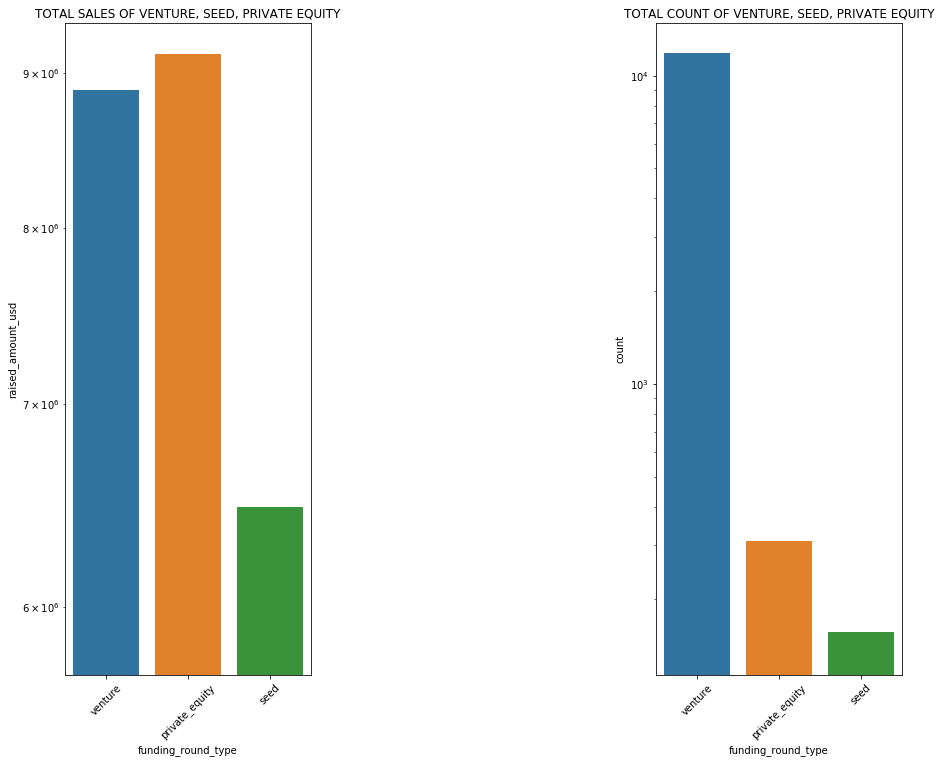

In [107]:
plt.figure(figsize=(15,12))
plt.title("TOTAL SALES AND COUNT OF VENTURE, SEED, PRIVATE EQUITY")
plt.subplot(131)
plt.title("TOTAL SALES OF VENTURE, SEED, PRIVATE EQUITY")
plt.yscale('log')
plt.xticks(rotation=45)
sb.barplot(x = test_df['funding_round_type'],y = test_df['raised_amount_usd'],ci = False)
plt.subplot(133)
plt.title("TOTAL COUNT OF VENTURE, SEED, PRIVATE EQUITY")
plt.yscale('log')
plt.xticks(rotation=45)
sb.countplot(x = test_df['funding_round_type'])
plt.show()

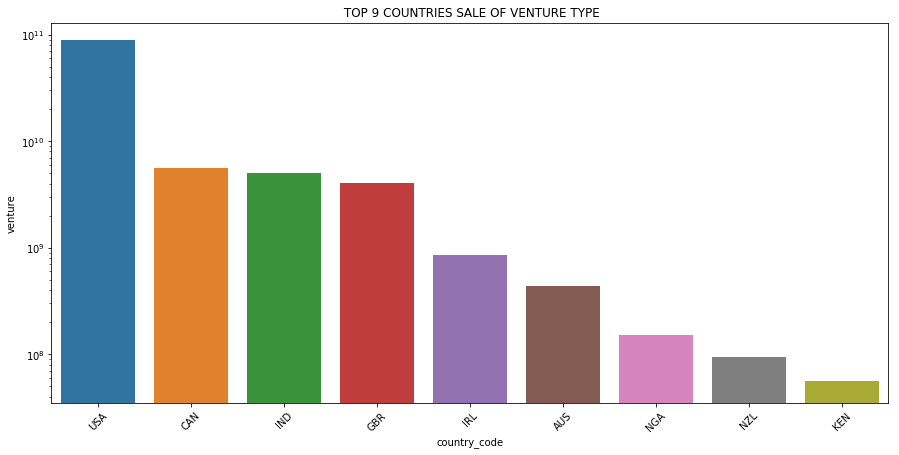

In [108]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.yscale('log')
plt.title(" TOP 9 COUNTRIES SALE OF VENTURE TYPE")
sb.barplot(x = top_9.index, y = top_9['venture'])

In [109]:
usa_top3_sector = ['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
can_top3_sector = ['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
ind_top3_sector = ['Others','News, Search and Messaging','Social, Finance, Analytics, Advertising']

In [110]:
D1_new = D1[D1['main_sector'].isin(usa_top3_sector)]
D2_new = D2[D2['main_sector'].isin(can_top3_sector)]
D3_new = D3[D3['main_sector'].isin(ind_top3_sector)]

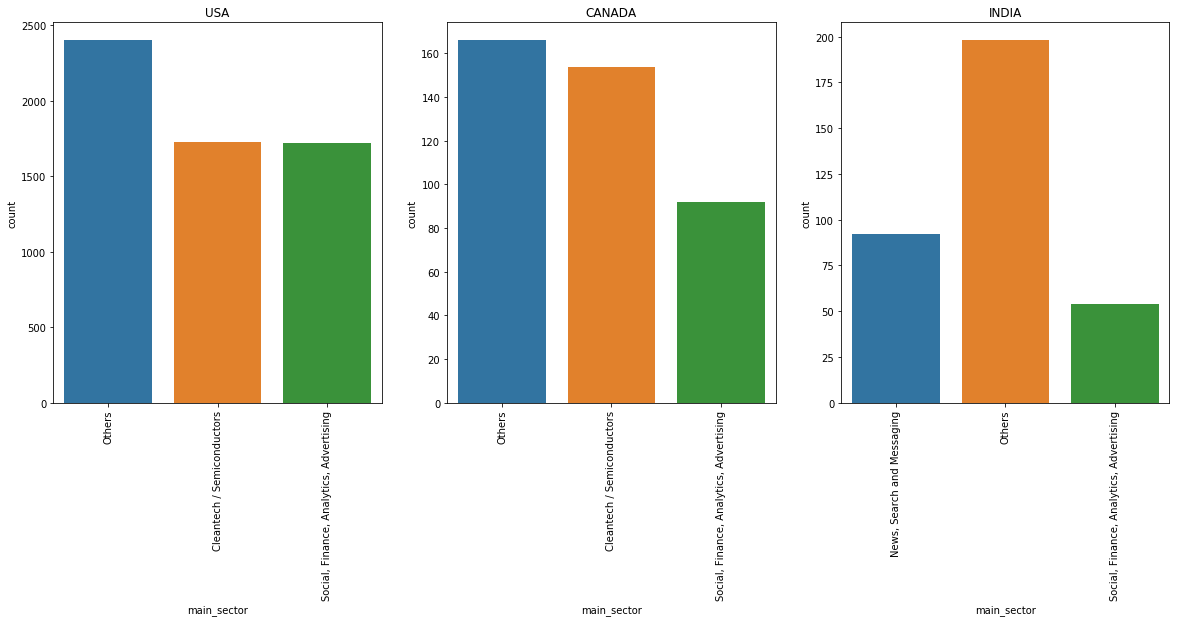

In [111]:
plt.figure(figsize = (20,7))
# FOR USA
plt.subplot(131)
plt.title('USA')
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D1_new)

#FOR CANADA
plt.subplot(132)
plt.title('CANADA')
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D2_new)


#FOR INDIA
plt.subplot(133)
plt.title('INDIA')
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D3_new)

plt.show()